In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

### Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по неделям.

In [2]:
#Path_Energy = 'PJME_hourly.csv'
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


/home/belfigor/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


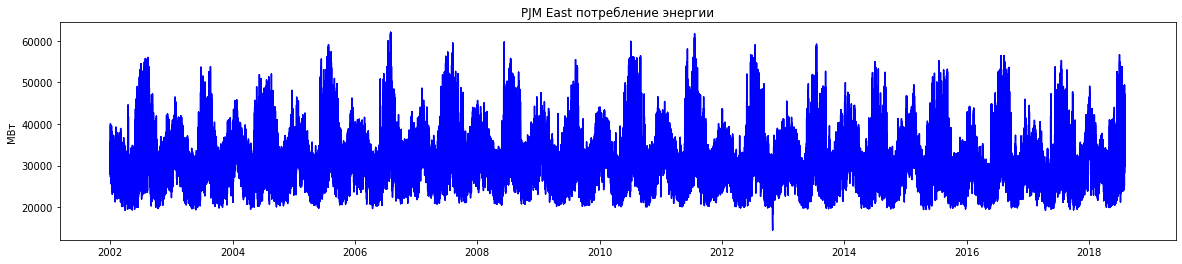

In [3]:
plt.figure(figsize =(20,4))
plt.plot( data.index, data['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

In [4]:
#path_brent = 'brent_cl_m5_20120101_20121231.csv'
#brent_data['Значение'] =brent_data['CLOSE']
#brent_data = pd.read_csv(path_brent,sep = ';', index_col=[0], parse_dates=[0])
path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


Text(0.5, 0, 't')

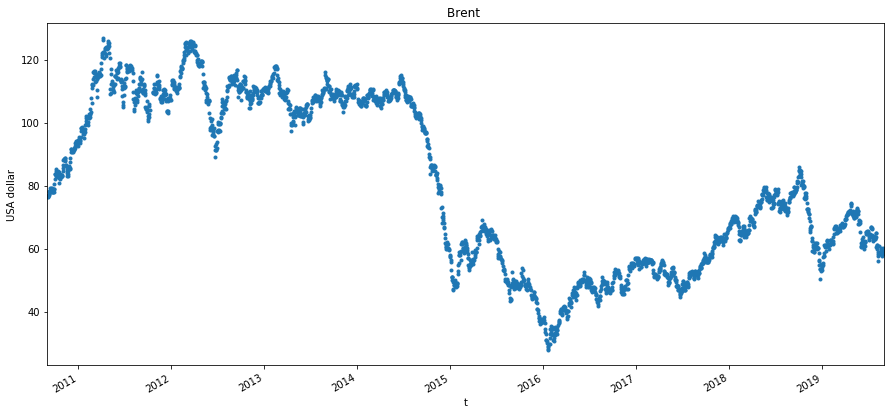

In [5]:
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [6]:
data_d = data.copy().resample('W').mean()
data_d.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,11.58042,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,11.50000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,11.50000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,11.50000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,11.50000,0.000000,0.000000,0.000000


Удаляю часовые записи т.к. они не актуальны ввиду перерасчета данных на недельный промежуток

In [7]:
data_d.drop('hour', axis=1,inplace=True)
data_d.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,0.000000,0.000000,0.000000


Удаляю годовые данные т.к. в годовом развороте нету тренда

In [8]:
data_d.drop('year', axis=1,inplace=True)

In [9]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE 
import seaborn as sns

scl=StandardScaler()
tsne_ =TSNE(n_components=2)

X = data_d.iloc[:,:-1].values

Xscale = scl.fit_transform(X)
X_t = tsne_.fit_transform(Xscale)

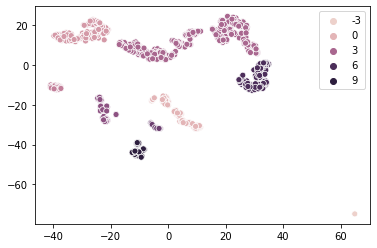

In [10]:
clast_0 = DBSCAN(eps=5, leaf_size=15 )
clast_1 = DBSCAN(eps=2, leaf_size=5)
X_clast =clast_0.fit_predict(X_t)
X_scale_clast =clast_1.fit_predict(Xscale)

sns.scatterplot(X_t[:,0],X_t[:,1], hue=X_clast)
plt.show()

In [11]:
print('Число кластеров в календаре с масштабированием: ',len(np.unique(X_scale_clast)))
print('Число кластеров в календаре: ',len(np.unique(X_clast)))

Число кластеров в календаре с масштабированием:  7
Число кластеров в календаре:  9


In [12]:
data_d['day_week_month'] = X_clast
data_d.iloc[np.where(data_d['day_week_month']==0)[0]].iloc[:10,:]

,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,day_week_month
Date,,,,,,,,,,,
2002-01-06,32392.160839,1.000000,3.517483,1.0,3.517483,1.0,3.517483,0.160839,0.0,0.167832,0
2002-01-27,30141.529762,1.000000,24.000000,1.0,24.000000,4.0,3.000000,0.142857,0.0,0.142857,0
2002-02-24,29144.130952,2.000000,21.000000,1.0,52.000000,8.0,3.000000,0.142857,0.0,0.142857,0
2002-06-02,31448.660714,5.285714,21.142857,2.0,150.000000,22.0,3.000000,0.142857,0.0,0.142857,0
2002-09-08,31535.172619,9.000000,5.000000,3.0,248.000000,36.0,3.000000,0.142857,0.0,0.142857,0
2002-10-20,27504.827381,10.000000,17.000000,4.0,290.000000,42.0,3.000000,0.142857,0.0,0.142857,0
2002-11-17,28881.886905,11.000000,14.000000,4.0,318.000000,46.0,3.000000,0.142857,0.0,0.142857,0
2003-01-26,37169.547619,1.000000,23.000000,1.0,23.000000,4.0,3.000000,0.142857,0.0,0.142857,0
2003-02-23,33023.458333,2.000000,20.000000,1.0,51.000000,8.0,3.000000,0.142857,0.0,0.142857,0


In [13]:
data_d.iloc[np.where(data_d['day_week_month']==2)[0]].iloc[:10,:]

,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,day_week_month
Date,,,,,,,,,,,
2002-01-20,31452.880952,1.0,17.0,1.0,17.0,3.0,3.0,0.0,0.142857,0.0,2
2002-02-17,30616.565476,2.0,14.0,1.0,45.0,7.0,3.0,0.0,0.142857,0.0,2
2003-01-19,35999.547619,1.0,16.0,1.0,16.0,3.0,3.0,0.0,0.142857,0.0,2
2003-02-16,35533.589286,2.0,13.0,1.0,44.0,7.0,3.0,0.0,0.142857,0.0,2
2004-01-18,36814.470238,1.0,15.0,1.0,15.0,3.0,3.0,0.0,0.142857,0.0,2
2004-02-15,33151.982143,2.0,12.0,1.0,43.0,7.0,3.0,0.0,0.142857,0.0,2
2005-01-16,32488.148810,1.0,13.0,1.0,13.0,2.0,3.0,0.0,0.142857,0.0,2
2005-02-20,33284.934524,2.0,17.0,1.0,48.0,7.0,3.0,0.0,0.142857,0.0,2
2006-01-15,31858.672619,1.0,12.0,1.0,12.0,2.0,3.0,0.0,0.142857,0.0,2


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
Xpca=pca.fit_transform(Xscale[:,1:])
Xpca.shape

(866, 2)

In [15]:
data_d['pca1']=Xpca[:,0]
data_d['pca2']=Xpca[:,1]

In [16]:
first_diff =np.array(data_d.iloc[1:,0].values - data_d.iloc[:-1,0].values).astype('float32') 
data_d['diff1'] = 0
data_d['diff1'] =  data_d['diff1'].astype('float') 
data_d['diff1'].values[1:] = first_diff

In [17]:
first_diff_d =(first_diff) / data_d.iloc[1:,0].values
data_d['diff1_d'] = 0
data_d['diff1_d'] = data_d['diff1_d'].astype('float') 
data_d['diff1_d'].values[1:] = np.array(first_diff_d).astype('float32')

In [18]:
first_diff_l = np.log(data_d.iloc[1:,0].values) 
data_d['diff1_l'] = 0
data_d['diff1_l'] = data_d['diff1_l'].astype('float') 
data_d['diff1_l'].values[1:] = first_diff_l

Добавлю скользящую среднюю с глубиной 4 недели

In [19]:
data_d['d_m1']=data_d['PJME_MW'].rolling(window=4).mean()

In [20]:
def exponential_smoothing(series, alpha):
    result = [series[0]] 
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

data_d['exp_0_05'] = exponential_smoothing(data_d['PJME_MW'], 0.05)

In [21]:
data_d.iloc[10:15,:]

,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,day_week_month,pca1,pca2,diff1,diff1_d,diff1_l,d_m1,exp_0_05
Date,,,,,,,,,,,,,,,,,,
2002-03-17,28672.779762,3.0,14.000000,1.0,73.000000,11.0,3.000000,0.0,0.0,0.0,1,-2.283898,0.420823,-768.130981,-0.026790,10.263704,29281.708333,31436.852496
2002-03-24,29927.488095,3.0,21.000000,1.0,80.000000,12.0,3.000000,0.0,0.0,0.0,1,-2.181299,0.324182,1254.708374,0.041925,10.306533,29477.547619,31361.384276
2002-03-31,27595.869048,3.0,28.000000,1.0,87.000000,13.0,3.000000,0.0,0.0,0.0,1,-2.078700,0.227541,-2331.619141,-0.084492,10.225421,28909.261905,31173.108514
2002-04-07,28308.778443,4.0,3.982036,2.0,93.982036,14.0,2.982036,0.0,0.0,0.0,3,-1.534367,0.724047,712.909424,0.025183,10.250927,28626.228837,31029.892011
2002-04-14,27182.482143,4.0,11.000000,2.0,101.000000,15.0,3.000000,0.0,0.0,0.0,3,-1.436971,0.563263,-1126.296265,-0.041435,10.210328,28253.654432,30837.521517


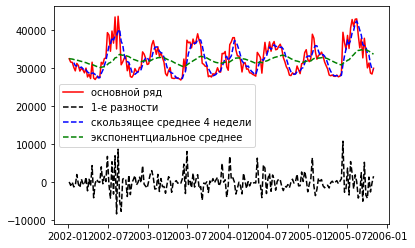

In [22]:
N100=200
plt.plot(data_d.index[:N100],data_d['PJME_MW'][:N100],'r',label ='основной ряд')
plt.plot(data_d.index[:N100],data_d['diff1'][:N100],'--k',label ='1-е разности')
plt.plot(data_d.index[:N100],data_d['d_m1'][:N100],'--b',label ='скользящее среднее 4 недели')
plt.plot(data_d.index[:N100],data_d['exp_0_05'][:N100],'--g',label ='экспонентциальное среднее')
plt.legend()
plt.show()

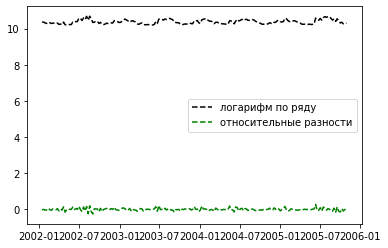

In [23]:
N100=200
plt.plot(data_d.index[1:N100],data_d['diff1_l'][1:N100],'--k',label ='логарифм по ряду')

plt.plot(data_d.index[1:N100],data_d['diff1_d'][1:N100],'--g',label ='относительные разности')
plt.legend()
plt.show()

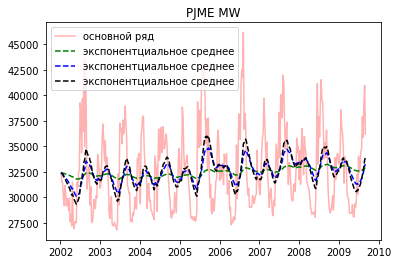

In [24]:
data_d['exp_0_01'] = exponential_smoothing(data_d['PJME_MW'], 0.01)
data_d['exp_0_03'] = exponential_smoothing(data_d['PJME_MW'], 0.03)
data_d['exp_0_04'] = exponential_smoothing(data_d['PJME_MW'], 0.04)
data_d['exp_0_06'] = exponential_smoothing(data_d['PJME_MW'], 0.06)
data_d['exp_0_07'] = exponential_smoothing(data_d['PJME_MW'], 0.07)
data_d['exp_0_08'] = exponential_smoothing(data_d['PJME_MW'], 0.08)

N100=400
plt.plot(data_d.index[:N100],data_d['PJME_MW'][:N100],'r',label ='основной ряд',alpha=0.3)
plt.plot(data_d.index[:N100],data_d['exp_0_01'][:N100],'--g',label ='экспонентциальное среднее')
plt.plot(data_d.index[:N100],data_d['exp_0_05'][:N100],'--b',label ='экспонентциальное среднее')
plt.plot(data_d.index[:N100],data_d['exp_0_08'][:N100],'--k',label ='экспонентциальное среднее')
plt.legend()
plt.title('PJME MW')
plt.show()

In [25]:
data_d.iloc[:7,14]=0

Длинну истории я возьму 4 недели p = 4

In [26]:
p = 4
for i in range(p):
    data_d['t'+str(p-i)]=0
    data_d['t'+str(p-i)].values[p:] = data_d['PJME_MW'].values[i:-(p)+i]

In [27]:
p = 4
for i in range(p):
    data_d['d'+str(p-i)]=0
    data_d['d'+str(p-i)].values[p:] = data_d['diff1'].values[i:-(p)+i]

In [28]:
data_d.head(10)

,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,...,exp_0_07,exp_0_08,t4,t3,t2,t1,d4,d3,d2,d1
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-06,32392.160839,1.000000,3.517483,1.0,3.517483,1.0,3.517483,0.160839,0.000000,0.167832,...,32392.160839,32392.160839,0,0,0,0,0,0,0,0
2002-01-13,31487.386905,1.000000,10.000000,1.0,10.000000,2.0,3.000000,0.000000,0.000000,0.000000,...,32328.826664,32319.778924,0,0,0,0,0,0,0,0
2002-01-20,31452.880952,1.000000,17.000000,1.0,17.000000,3.0,3.000000,0.000000,0.142857,0.000000,...,32267.510464,32250.427087,0,0,0,0,0,0,0,0
2002-01-27,30141.529762,1.000000,24.000000,1.0,24.000000,4.0,3.000000,0.142857,0.000000,0.142857,...,32118.691815,32081.715301,0,0,0,0,0,0,0,0
2002-02-03,29196.488095,1.428571,17.714286,1.0,31.000000,5.0,3.000000,0.000000,0.000000,0.000000,...,31914.137554,31850.897124,32392,31487,31452,30141,0,-904,-34,-1311
2002-02-10,31150.517857,2.000000,7.000000,1.0,38.000000,6.0,3.000000,0.000000,0.000000,0.000000,...,31860.684176,31794.866783,31487,31452,30141,29196,-904,-34,-1311,-945
2002-02-17,30616.565476,2.000000,14.000000,1.0,45.000000,7.0,3.000000,0.000000,0.142857,0.000000,...,31773.595867,31700.602678,31452,30141,29196,31150,-34,-1311,-945,1954
2002-02-24,29144.130952,2.000000,21.000000,1.0,52.000000,8.0,3.000000,0.142857,0.000000,0.142857,...,31589.533323,31496.084940,30141,29196,31150,30616,-1311,-945,1954,-533
2002-03-03,29869.011905,2.428571,16.000000,1.0,59.000000,9.0,3.000000,0.000000,0.000000,0.000000,...,31469.096823,31365.919097,29196,31150,30616,29144,-945,1954,-533,-1472


In [29]:
scl_target=StandardScaler() 
# p = 4
h=1
target = data_d['PJME_MW'].values[h+p:].reshape((data_d.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape

(861, 1)

In [30]:
scl_x=StandardScaler() 

X = data_d.iloc[p:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(861, 32)

In [31]:
# X[:7,14]
X[:p,14]=0

In [32]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import f_regression, mutual_info_regression

f_test, _ = f_regression(X, y.ravel())
f_test /= np.max(f_test)
for i in range(X.shape[1]):
    print("F-test={:.2f},  I={}".format(f_test[i],i))

F-test=0.97,  I=0
F-test=0.00,  I=1
F-test=0.00,  I=2
F-test=0.00,  I=3
F-test=0.00,  I=4
F-test=0.00,  I=5
F-test=0.00,  I=6
F-test=0.00,  I=7
F-test=0.00,  I=8
F-test=0.00,  I=9
F-test=0.00,  I=10
F-test=0.00,  I=11
F-test=0.00,  I=12
F-test=0.02,  I=13
F-test=0.01,  I=14
F-test=1.00,  I=15
F-test=0.58,  I=16
F-test=0.02,  I=17
F-test=0.01,  I=18
F-test=0.01,  I=19
F-test=0.02,  I=20
F-test=0.03,  I=21
F-test=0.04,  I=22
F-test=0.05,  I=23
F-test=0.07,  I=24
F-test=0.16,  I=25
F-test=0.30,  I=26
F-test=0.51,  I=27
F-test=0.04,  I=28
F-test=0.03,  I=29
F-test=0.02,  I=30
F-test=0.02,  I=31


Проверка F-test показывает F-test=1.00,  I=15 , что оч подозрительна -_-

In [66]:
sfk =SelectKBest(f_regression, k=4) #Автоподбором нахожу 4 лучших признака
X_new1 =sfk.fit_transform(X, y.ravel())
X_new1.shape

(861, 4)

In [67]:
column_names = data_d.columns[sfk.get_support()]
column_names

Index(['PJME_MW', 'diff1_l', 'd_m1', 't1'], dtype='object')

Почему-то сюда не попало ниодной экспоненциальной средней

In [68]:
X_new1[295:300,:]

array([[ 0.32979   ,  0.3927457 ,  0.50883053, -0.20775929],
       [ 0.29081018,  0.35428846,  0.21680462,  0.33193293],
       [-0.11588231, -0.05803253,  0.08577175,  0.29279208],
       [-0.52632114, -0.49617724, -0.00340987, -0.11417249],
       [-0.60988386, -0.58830717, -0.26783946, -0.52464971]])

In [69]:
sfp=SelectPercentile(f_regression, percentile=10)
X_new2 = sfp.fit_transform(X, y.ravel())
X_new2.shape

(861, 4)

In [70]:
column_namesp = data_d.columns[sfp.get_support()]
column_namesp

Index(['PJME_MW', 'diff1_l', 'd_m1', 't1'], dtype='object')

In [71]:
gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 4)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(861, 2)

In [72]:
[X_new1[10:15,:], X_new2[10:15,:],X_new3[10:15,:]]

[array([[-1.22806528, -1.30387191, -1.07732961, -0.94441033],
        [-0.14933367, -0.09288301, -0.96746346, -1.22692704],
        [-1.19436317, -1.26321759, -0.98714919, -0.14754259],
        [-1.29150524, -1.3809468 , -1.08447609, -1.19330604],
        [-1.1266082 , -1.18208769, -1.05592549, -1.29040548]]),
 array([[-1.22806528, -1.30387191, -1.07732961, -0.94441033],
        [-0.14933367, -0.09288301, -0.96746346, -1.22692704],
        [-1.19436317, -1.26321759, -0.98714919, -0.14754259],
        [-1.29150524, -1.3809468 , -1.08447609, -1.19330604],
        [-1.1266082 , -1.18208769, -1.05592549, -1.29040548]]),
 array([[-1.22806528, -1.30387191],
        [-0.14933367, -0.09288301],
        [-1.19436317, -1.26321759],
        [-1.29150524, -1.3809468 ],
        [-1.1266082 , -1.18208769]])]

In [73]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [ 0 15 16 27]
Номера признаков лучших признаков по процентной форме:  [ 0 15 16 27]
Номера признаков для выбора по модели :  [ 0 15]


In [74]:
list_par=[0,15,16,27]
X_new = X[:,list_par]
data_d.columns[list_par]

Index(['PJME_MW', 'diff1_l', 'd_m1', 't1'], dtype='object')

In [75]:
# сделаем функцию
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

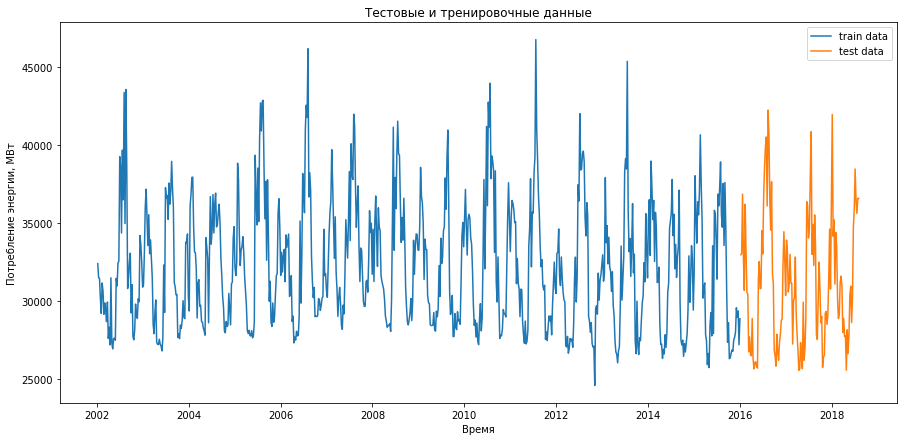

In [76]:
train, test = split_data( data_d, '01-06-2016')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train.index.get_level_values('Date'),train['PJME_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'),test['PJME_MW'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [77]:
X_train =X_new[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X_new[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [78]:
train.shape

(731, 32)

In [79]:
from sklearn.ensemble import GradientBoostingRegressor

In [80]:
model_g = GradientBoostingRegressor(max_depth=10, random_state=0, n_estimators=20)

In [81]:
model_g.fit( X_train, y_train ) #

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=20,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [82]:
X_test.shape

(130, 4)

In [83]:
y_test_pred_g = model_g.predict(X_test)

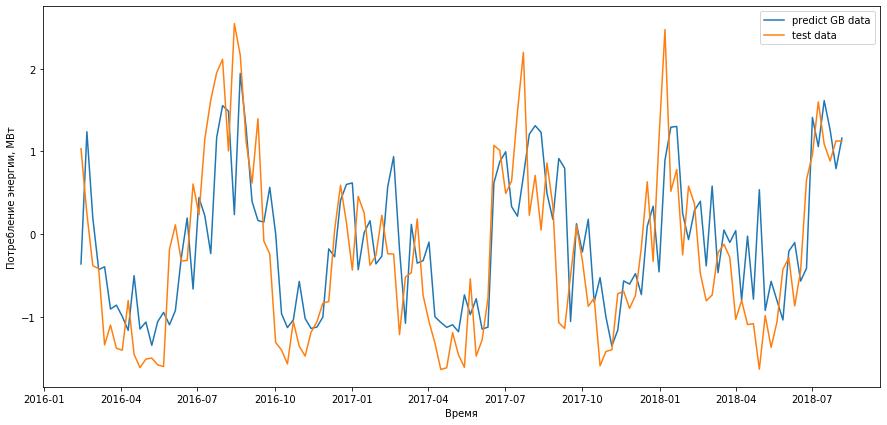

In [84]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h+p:],y_test_pred_g, label='predict GB data' )
plt.plot(test.index[h+p:],y_test, label='test data')

plt.legend()
plt.show()

In [85]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [86]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.5933633663913372 
ошибка mae  :   0.604291363278273 
оценка R2 :   0.4411355243762656


In [87]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [88]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   7.765864684252896 %


In [89]:
from sklearn.model_selection import RandomizedSearchCV

def report(results, n_top=30):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_dist = {"max_depth": [3, 2,1], 
              "n_estimators":[100,200,300,400,500]}

#  randomized search
n_iter_search = 100

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=4, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

/home/belfigor/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 15 is smaller than n_iter=100. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Model with rank: 1
Mean validation score: 0.620 (std: 0.054)
Parameters: {'n_estimators': 100, 'max_depth': 1}

Model with rank: 2
Mean validation score: 0.614 (std: 0.056)
Parameters: {'n_estimators': 200, 'max_depth': 1}

Model with rank: 3
Mean validation score: 0.609 (std: 0.056)
Parameters: {'n_estimators': 100, 'max_depth': 2}

Model with rank: 4
Mean validation score: 0.609 (std: 0.058)
Parameters: {'n_estimators': 300, 'max_depth': 1}

Model with rank: 5
Mean validation score: 0.604 (std: 0.060)
Parameters: {'n_estimators': 400, 'max_depth': 1}

Model with rank: 6
Mean validation score: 0.601 (std: 0.062)
Parameters: {'n_estimators': 500, 'max_depth': 1}

Model with rank: 7
Mean validation score: 0.588 (std: 0.063)
Parameters: {'n_estimators': 100, 'max_depth': 3}

Model with rank: 8
Mean validation score: 0.587 (std: 0.058)
Parameters: {'n_estimators': 200, 'max_depth': 2}

Model with rank: 9
Mean validation score: 0.572 (std: 0.061)
Parameters: {'n_estimators': 300, 'max_dept

In [90]:
model_g_best = GradientBoostingRegressor(max_depth=1,  n_estimators=100)
model_g_best.fit( X_train, y_train ) 
y_test_pred_g = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   6.741395307506104 %


In [91]:
import pickle
# save the model to disk
filename = 'final_model.sav'
pickle.dump(model_g_best, open(filename, 'wb'))

filename = 'final_scaler_y.sav'
pickle.dump(scl_target, open(filename, 'wb'))

filename = 'final_scaler_x.sav'
pickle.dump(scl_x, open(filename, 'wb'))

In [92]:
scl_x.scale_[0] , scl_x.mean_[0]

(3988.022510057557, 32080.034119151045)

In [93]:
# X_test_100[0,:].reshape((1,3))

### Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков .

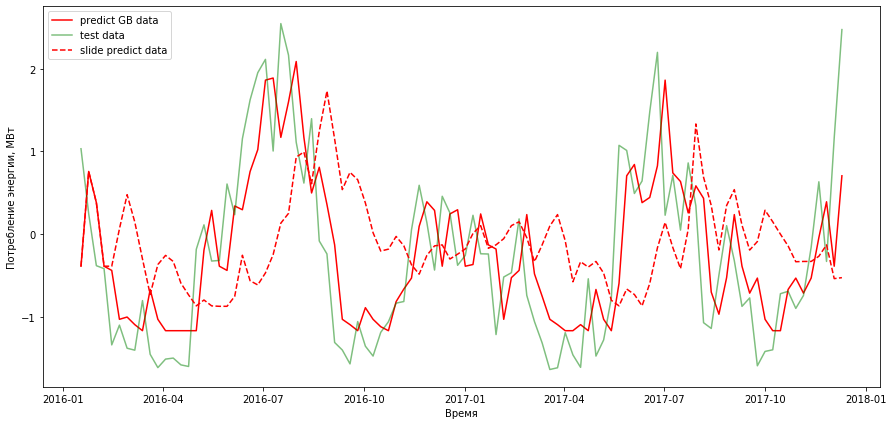

In [112]:
#['PJME_MW', 'dayofweek', 'pca2', 'd_w7', 'diff1_l', 'exp_0_07', 'exp_0_08']
# ['PJME_MW', 'diff1_l', 'd_m1', 't1']
X_test_100 = X_test.copy()
y_test_100 = y_test_pred_g.copy()
N10 = 100
for i in range(N10):
    #Исходя из текущего X, я предсказываю текущий y
    y_test_100[i+4] = model_g_best.predict(X_test_100[i,:].reshape((1,4))) 
    
    
    # восстанавливаем не масштабированное значение ряда текущей точке  
    y_i=scl_target.inverse_transform(y_test_100[i:i+1]  )
                                     
    # заполняем вектор для прогноза следующей точки (PJME_MW, параметр 0)
    X_test_100[i+1,0] = (y_i-scl_x.mean_[0])/scl_x.scale_[0]

    #строим 'd_m1' - признак под номером 2, для следующей точки
    if i>p: #если i > 4 (p==4)
        #второй параметр (d_m1) массива X_test_100, точки i+1 (следующей за текущей точкой),
        #будет равняться среднему значению среза X_test_100[(i+1-4=i-3) : i+1]
        X_test_100[i+1,2] = np.mean(X_test_100[i+1-p:i+1,0])
#         data_d['d_m1']=data_d['PJME_MW'].rolling(window=4).mean()

#     p = 4
    
    for i in range(p):
        X_test_100[3]=0
        X_test_100[3][p:] = X_test_100[0][i:-(p)+i]

    #строим 'diff1_l' - признак под номером 1
    # строим логарифм по значению ряда и скалируем признак по схеме 15-го признака из основного списка
    xy_i=(np.log((y_i))-scl_x.mean_[15])*scl_x.scale_[15]
    #устанавливаем новое значение для 4
    X_test_100[i+1,1] = xy_i 
        
    
    
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[1:N10+1],y_test_pred_g[:N10], 'r',label='predict GB data' )
plt.plot(test.index[1:N10+1],y_test[:N10], 'g',label='test data', alpha=0.5)
plt.plot(test.index[1:N10+1],y_test_100[:N10], '--r',label='slide predict data')

plt.legend()
plt.show()    

In [105]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test[:N10]),y_pred = scl_target.inverse_transform( y_test_100[:N10]))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   8.346789444772726 %


### Постройте модель предсказания 1-й точки от текущей (h = 1), используя результаты автокорреляционного анализа из предшествующих уроков.

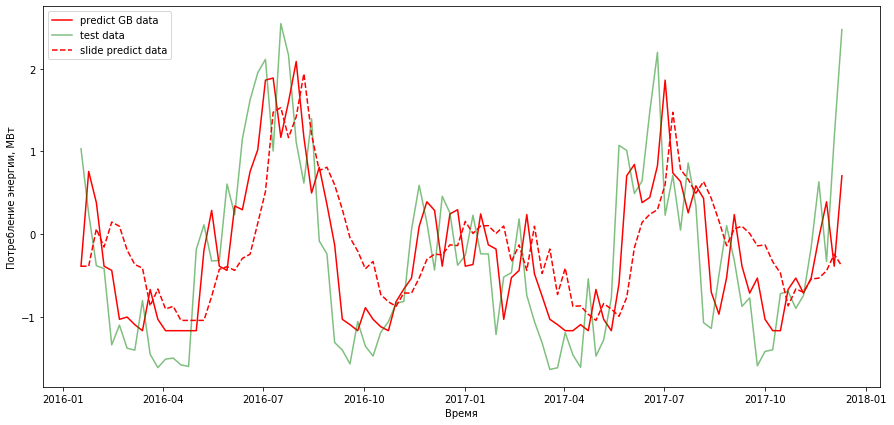

In [114]:
#['PJME_MW', 'dayofweek', 'pca2', 'd_w7', 'diff1_l', 'exp_0_07', 'exp_0_08']
# ['PJME_MW', 'diff1_l', 'd_m1', 't1']
X_test_100 = X_test.copy()
y_test_100 = y_test_pred_g.copy()
N10 = 100
for i in range(N10):
    #Исходя из текущего X, я предсказываю текущий y
    y_test_100[i+1] = model_g_best.predict(X_test_100[i,:].reshape((1,4))) 
    
    
    # восстанавливаем не масштабированное значение ряда текущей точке  
    y_i=scl_target.inverse_transform(y_test_100[i:i+1]  )
                                     
    # заполняем вектор для прогноза следующей точки (PJME_MW, параметр 0)
    X_test_100[i+1,0] = (y_i-scl_x.mean_[0])/scl_x.scale_[0]

    #строим 'd_m1' - признак под номером 2, для следующей точки
    if i>p: #если i > 4 (p==4)
        #второй параметр (d_m1) массива X_test_100, точки i+1 (следующей за текущей точкой),
        #будет равняться среднему значению среза X_test_100[(i+1-4=i-3) : i+1]
        X_test_100[i+1,2] = np.mean(X_test_100[i+1-p:i+1,0])
#         data_d['d_m1']=data_d['PJME_MW'].rolling(window=4).mean()

#     p = 4
    
    for i in range(p):
        X_test_100[3]=0
        X_test_100[3][p:] = X_test_100[0][i:-(p)+i]

    #строим 'diff1_l' - признак под номером 1
    # строим логарифм по значению ряда и скалируем признак по схеме 15-го признака из основного списка
    xy_i=(np.log((y_i))-scl_x.mean_[15])*scl_x.scale_[15]
    #устанавливаем новое значение для 4
    X_test_100[i+1,1] = xy_i 
        
    
    
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[1:N10+1],y_test_pred_g[:N10], 'r',label='predict GB data' )
plt.plot(test.index[1:N10+1],y_test[:N10], 'g',label='test data', alpha=0.5)
plt.plot(test.index[1:N10+1],y_test_100[:N10], '--r',label='slide predict data')

plt.legend()
plt.show()    

In [107]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test[:N10]),y_pred = scl_target.inverse_transform( y_test_100[:N10]))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   8.941965961061111 %


### Примените авторекурсию и сравните результат в 4-й точке путем прямого моделирования и путем рекурсивного моделирования на длине выборки из 4-х точек.

[30532.97482214]
[32332.6570807]
[33037.20768094]
[32663.48716225]


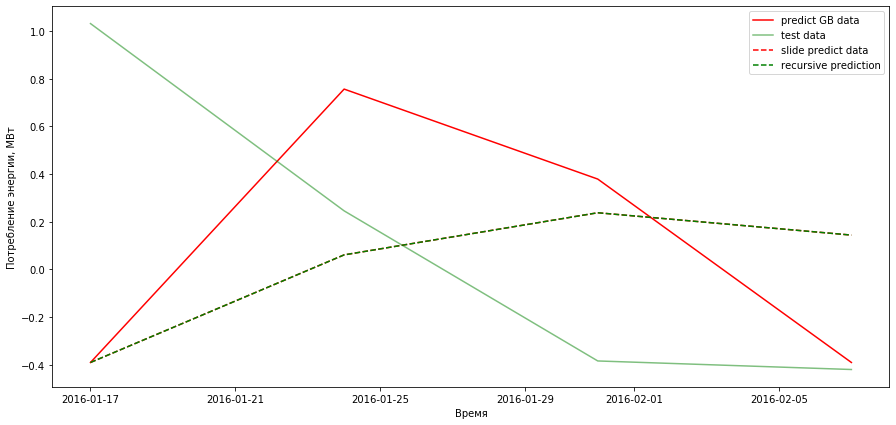

In [151]:
#['PJME_MW', 'dayofweek', 'pca2', 'd_w7', 'diff1_l', 'exp_0_07', 'exp_0_08']
# ['PJME_MW', 'diff1_l', 'd_m1', 't1']
X_test_100 = X_test.copy()
y_test_100 = y_test_pred_g.copy()

X_test_100_rec = X_test.copy()
y_test_100_rec = y_test_pred_g.copy()
N10 = 4
for i in range(N10):
    #Исходя из текущего X, я предсказываю текущий y
    y_test_100[i] = model_g_best.predict(X_test_100[i,:].reshape((1,4))) 
    
    #Делаю рекурсивное предсказание в значения PJMW текущей точки y_test_100_rec[i] по данным текущей точки X_test_100_rec[i,:]
    y_test_100_rec[i] = model_g_best.predict(X_test_100_rec[i,:].reshape((1,4))) 
    #Записываю результат текущей точки, как значение PJMW следующей точки
    X_test_100_rec[i+1,0] = y_test_100_rec[i]

    # восстанавливаем не масштабированное значение ряда текущей точке  
    y_i=scl_target.inverse_transform(y_test_100[i:i+1]  )
    y_i_rec=scl_target.inverse_transform(y_test_100_rec[i:i+1]  )
#     print(scl_target.inverse_transform(y_test_100_rec[i:i+1]  ))
    # заполняем вектор для прогноза следующей точки (PJME_MW, параметр 0)
    X_test_100[i+1,0] = (y_i-scl_x.mean_[0])/scl_x.scale_[0]

    #строим 'd_m1' - признак под номером 2, для следующей точки
    if i>p: #если i > 4 (p==4)
        #второй параметр (d_m1) массива X_test_100, точки i+1 (следующей за текущей точкой),
        #будет равняться среднему значению среза X_test_100[(i+1-4=i-3) : i+1]
        X_test_100[i+1,2] = np.mean(X_test_100[i+1-p:i+1,0])
        X_test_100_rec[i+1,2] = np.mean(X_test_100_rec[i+1-p:i+1,0])
#         data_d['d_m1']=data_d['PJME_MW'].rolling(window=4).mean()

#     p = 4
    
    for i in range(p):
        X_test_100[3]=0
        X_test_100[3][p:] = X_test_100[0][i:-(p)+i]
        X_test_100_rec[3]=0
        X_test_100_rec[3][p:] = X_test_100_rec[0][i:-(p)+i]

    #строим 'diff1_l' - признак под номером 1
    # строим логарифм по значению ряда и скалируем признак по схеме 15-го признака из основного списка
    xy_i=(np.log((y_i))-scl_x.mean_[15])*scl_x.scale_[15]
    xy_i_rec=(np.log((y_i_rec))-scl_x.mean_[15])*scl_x.scale_[15]
    #устанавливаем новое значение для 4
    X_test_100[i+1,1] = xy_i 
    X_test_100[i+1,1] = xy_i_rec 
        
    
    
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[1:N10+1],y_test_pred_g[:N10], 'r',label='predict GB data' )
plt.plot(test.index[1:N10+1],y_test[:N10], 'g',label='test data', alpha=0.5)
plt.plot(test.index[1:N10+1],y_test_100[:N10], '--r',label='slide predict data')
plt.plot(test.index[1:N10+1],y_test_100_rec[:N10], '--g',label='recursive prediction')

plt.legend()
plt.show()    

In [109]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test[:N10]),y_pred = scl_target.inverse_transform( y_test_100[:N10]))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   8.346789444772726 %


### Оцените рост ошибки прогнозирования рекурсивной модели в интервалах от 1-й до 10-й, от 10-й до 20-й, от 20-й до 30-й, .. .10i-й до (i+1)10 -й,... ,от 90 до 100-й точках (используйте осреднение по десяткам точек)

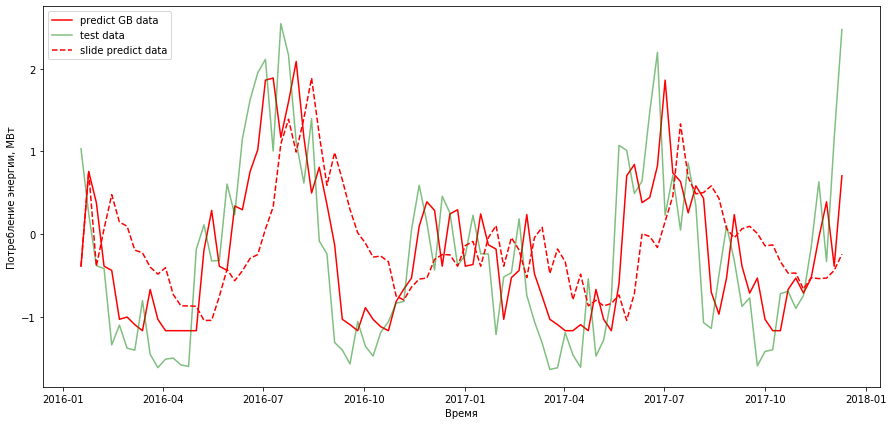

In [139]:
#['PJME_MW', 'dayofweek', 'pca2', 'd_w7', 'diff1_l', 'exp_0_07', 'exp_0_08']
# ['PJME_MW', 'diff1_l', 'd_m1', 't1']
X_test_100 = X_test.copy()
y_test_100 = y_test_pred_g.copy()
N10 = 100
for i in range(N10):
    #Исходя из текущего X, я предсказываю текущий y
    y_test_100[i+2] = model_g_best.predict(X_test_100[i,:].reshape((1,4))) 
    
    
    # восстанавливаем не масштабированное значение ряда текущей точке  
    y_i=scl_target.inverse_transform(y_test_100[i:i+1]  )
                                     
    # заполняем вектор для прогноза следующей точки (PJME_MW, параметр 0)
    X_test_100[i+1,0] = (y_i-scl_x.mean_[0])/scl_x.scale_[0]

    #строим 'd_m1' - признак под номером 2, для следующей точки
    if i>p: #если i > 4 (p==4)
        #второй параметр (d_m1) массива X_test_100, точки i+1 (следующей за текущей точкой),
        #будет равняться среднему значению среза X_test_100[(i+1-4=i-3) : i+1]
        X_test_100[i+1,2] = np.mean(X_test_100[i+1-p:i+1,0])
#         data_d['d_m1']=data_d['PJME_MW'].rolling(window=4).mean()

#     p = 4
    
    for i in range(p):
        X_test_100[3]=0
        X_test_100[3][p:] = X_test_100[0][i:-(p)+i]

    #строим 'diff1_l' - признак под номером 1
    # строим логарифм по значению ряда и скалируем признак по схеме 15-го признака из основного списка
    xy_i=(np.log((y_i))-scl_x.mean_[15])*scl_x.scale_[15]
    #устанавливаем новое значение для 4
    X_test_100[i+1,1] = xy_i 
        
    
    
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[1:N10+1],y_test_pred_g[:N10], 'r',label='predict GB data' )
plt.plot(test.index[1:N10+1],y_test[:N10], 'g',label='test data', alpha=0.5)
plt.plot(test.index[1:N10+1],y_test_100[:N10], '--r',label='slide predict data')

plt.legend()
plt.show()    

In [140]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test[:N10]),y_pred = scl_target.inverse_transform( y_test_100[:N10]))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   11.736418300712458 %


In [141]:
for i in range(11):
    er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test[i*10:i*10+10]),y_pred = scl_target.inverse_transform( y_test_100[i*10:i*10+10]))
    print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   13.766093726380097 %
ошибка градиентного бустинга MAPE :   11.85219037490346 %
ошибка градиентного бустинга MAPE :   12.827106159792468 %
ошибка градиентного бустинга MAPE :   19.176323018276104 %
ошибка градиентного бустинга MAPE :   5.80001565224872 %
ошибка градиентного бустинга MAPE :   5.8518322937133815 %
ошибка градиентного бустинга MAPE :   12.310651272446796 %
ошибка градиентного бустинга MAPE :   12.456575858759726 %
ошибка градиентного бустинга MAPE :   13.478217588936428 %
ошибка градиентного бустинга MAPE :   9.8451770616674 %
ошибка градиентного бустинга MAPE :   6.235552915364016 %


### Сделайте вывод о том, как изменилось поведение ошибки предсказания ряда

Ошибка предсказания тем выше, чем его горизонт. Прогнозируя на 1 шаг вперёд, мы имеем наименьшую ошибку, но чем дальше мы пытаемся прогнозировать тем выше ошибка вплоть до того, что она начинает указывать на неверное направление движения графика. Пытаясь делать прогноз на 20-30 точек вперёд, результаты были настолько плохими что не улавливали даже пики графика.